In [73]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.viewer.mpl import drawModel1D

In [74]:
nlay = 3  # number of layers
lam = 200.  # (initial) regularization parameter
errPerc = 3.  # relative error of 3 percent
ab2 = np.logspace(-1, 2, 50)  # AB/2 distance (current electrodes)
mn2 = ab2 / 3.  # MN/2 distance (potential electrodes)

In [75]:
f = pg.core.DC1dModelling(nlay, ab2, mn2)

In [82]:
synres = [100., 500., 20.]  # synthetic resistivity
synthk = [0.5, 6]  # synthetic thickness (nlay-th layer is infinite)

In [83]:
rhoa = f(synthk+synres)
rhoa = rhoa * (pg.randn(len(rhoa), seed=0) * errPerc / 100. + 1.)

In [84]:
def invert(nlay):
    transThk = pg.trans.TransLog()  # log-transform ensures thk>0
    transRho = pg.trans.TransLogLU(1, 1000)  # lower and upper bound
    transRhoa = pg.trans.TransLog()  # log transformation for data
    
    f.region(0).setTransModel(transThk)  # 0=thickness
    f.region(1).setTransModel(transRho)  # 1=resistivity
    
    paraDepth = max(ab2) / 3.  # rule-of-thumb for Wenner/Schlumberger
    f.region(0).setStartValue(paraDepth / nlay / 2)
    f.region(1).setStartValue(np.median(rhoa))
    
    inv = pg.core.Inversion(rhoa, f, transRhoa, True)  # data vector, fop, verbose
    
    inv.setRelativeError(errPerc / 100.0)  # alternative: setAbsoluteError in Ohmm
    inv.setLambda(lam)  # (initial) regularization parameter
    inv.setMarquardtScheme(0.9)  # decrease lambda by factor 0.9
    model = f.createStartVector()  # creates from region start value
    
    model = inv.run()  # result is a pg.Vector, but compatible to numpy array
    res, thk = model[nlay-1:nlay*2-1], model[0:nlay-1]
    print('rrms={:.2f}%, chi^2={:.3f}'.format(inv.relrms(), inv.chi2()))
    
    return model, inv, res, thk

In [85]:
model3, inv3, res3, thk3 = invert(3)
model4, inv4, res4, thk4 = invert(4)
model2, inv2, res2, thk2 = invert(2)

rrms=3.12%, chi^2=1.077min/max(dweight) = 33.3333/33.3333
use model trans from RegionManager

rrms=3.12%, chi^2=1.077
rrms=3.12%, chi^2=1.077
min/max(dweight) = 33.3333/33.3333
Building constraints matrix
constraint matrix of size(nBounds x nModel) 5 x 5
calculating jacobian matrix (forced=1)...... 0.023 s
min data = 19.8947 max data = 364.915 (50)
min error = 0.03 max error = 0.03 (50)
min response = 102.044 max response = 102.044 (50)
calc without reference model
0: rms/rrms(data, response) = 123.784/132.78%
0: chi^2(data, response, error, log) = 811.899
0: Phi = 40595 + 20.1981 * 200 = 40595
Iter: 0
use local regularization
solve CGLSCDWWtrans with lambda = 200
Linesearch tau = 1
1: Model: min = 5.55556; max = 601.28
1: Response: min = 19.3888; max = 215.197
1: rms/rrms(data, Response) = 84.5057/72.9251%
1: chi^2(data, Response, error, log) = 314.702
1: Phi = 15735.1+29.351*200=15735.1
Iter: 1
calculating jacobian matrix (forced=1)...... 0.021 s
use local regularization
solve CGLSCD

/opt/anaconda3/conda-bld/pgcore_1645178403028/work/gimli/core/src/regionManager.h:182		void GIMLI::Region::setStartValue(double)  is deprecated 
/opt/anaconda3/conda-bld/pgcore_1645178403028/work/gimli/core/src/regionManager.h:182		void GIMLI::Region::setStartValue(double)  is deprecated 
/opt/anaconda3/conda-bld/pgcore_1645178403028/work/gimli/core/src/modellingbase.cpp:523		GIMLI::RVector GIMLI::ModellingBase::createStartVector()  is deprecated 
/opt/anaconda3/conda-bld/pgcore_1645178403028/work/gimli/core/src/regionManager.h:182		void GIMLI::Region::setStartValue(double)  is deprecated 
/opt/anaconda3/conda-bld/pgcore_1645178403028/work/gimli/core/src/regionManager.h:182		void GIMLI::Region::setStartValue(double)  is deprecated 
/opt/anaconda3/conda-bld/pgcore_1645178403028/work/gimli/core/src/modellingbase.cpp:523		GIMLI::RVector GIMLI::ModellingBase::createStartVector()  is deprecated 
/opt/anaconda3/conda-bld/pgcore_1645178403028/work/gimli/core/src/regionManager.h:182		void GIML

(nBounds x nModel) 5 x 5
calculating jacobian matrix (forced=1)...... 0.018 s
min data = 19.8947 max data = 364.915 (50)
min error = 0.03 max error = 0.03 (50)
min response = 102.044 max response = 102.044 (50)
calc without reference model
0: rms/rrms(data, response) = 123.784/132.78%
0: chi^2(data, response, error, log) = 811.899
0: Phi = 40595 + 20.1981 * 200 = 40595
Iter: 0
use local regularization
solve CGLSCDWWtrans with lambda = 200
Linesearch tau = 1
1: Model: min = 5.55556; max = 601.28
1: Response: min = 19.3888; max = 215.197
1: rms/rrms(data, Response) = 84.5057/72.9251%
1: chi^2(data, Response, error, log) = 314.702
1: Phi = 15735.1+29.351*200=15735.1
Iter: 1
calculating jacobian matrix (forced=1)...... 0.017 s
use local regularization
solve CGLSCDWWtrans with lambda = 180
2: LS newModel: min = 2.02164; max = 547.071
2: LS newResponse: min = 75.6383; max = 259.832
2: rms/rrms(data, LS newResponse) = 62.5314/98.6016%
2: chi^2(data, LS newResponse, error, log) = 349.169
2: Ph

[0.5, 6]


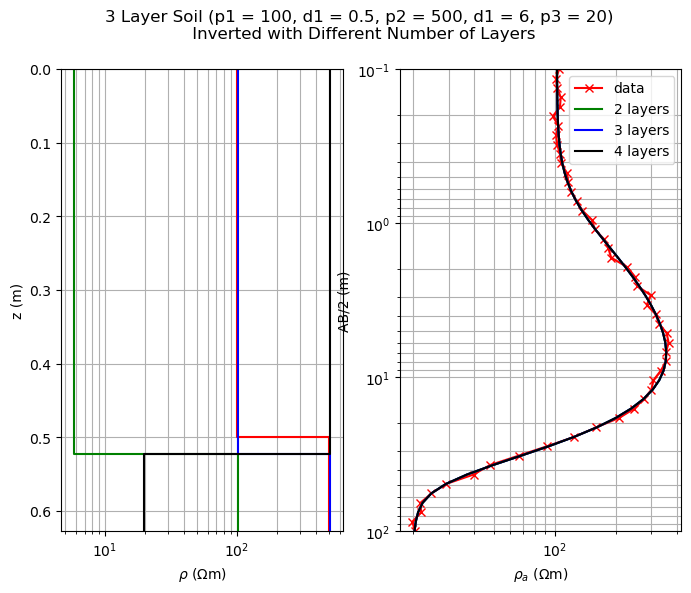

In [90]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 6))  # two-column figure
drawModel1D(ax[0], synthk, synres, plot='semilogx', color='r')
print(synthk)
drawModel1D(ax[0], thk2, res2, color='g')
drawModel1D(ax[0], thk3, res3, color='b')
drawModel1D(ax[0], thk4, res4, color='k')

ax[0].grid(True, which='both')
ax[0].set_ylabel('z (m)')
ax[0].set_xlabel(r'$\rho$ ($\Omega$m)')
#ax[0].set_ylim([6.5, 0])
ax[1].loglog(np.array(rhoa).reshape(len(rhoa),1), np.array(ab2).reshape(len(ab2),1), 'rx-', label='data')  # sounding curve
ax[1].loglog(np.array(inv2.response()), np.array(ab2).reshape(len(ab2),1), 'g-', label='2 layers')
ax[1].loglog(np.array(inv3.response()), np.array(ab2).reshape(len(ab2),1), 'b-', label='3 layers')
ax[1].loglog(np.array(inv4.response()), np.array(ab2).reshape(len(ab2),1), 'k-', label='4 layers')
ax[1].set_ylim((max(ab2), min(ab2)))  # downwards according to penetration
ax[1].grid(True, which='both')
ax[1].set_xlabel(r'$\rho_a$ ($\Omega$m)')
ax[1].set_ylabel('AB/2 (m)')
ax[1].legend(loc='best')

fig.suptitle("3 Layer Soil (p1 = 100, d1 = 0.5, p2 = 500, d1 = 6, p3 = 20) \n Inverted with Different Number of Layers")
plt.show()

In [87]:
inv.response().shape, ab2.shape

((50,), (50,))